In [3]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [4]:
train = pd.read_csv('BikeSharing/train.csv')
test = pd.read_csv('BikeSharing/test.csv')
submit = pd.read_csv('BikeSharing/sampleSubmission.csv')

In [5]:
train[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
test[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [10]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [12]:
#處理['count']的outlier
print("Shape Of The Before Outliers: ",train.shape)
train = train[np.abs( train['count']-train['count'].mean() ) <= ( 3*train['count'].std() )]
print("Shape Of The After Outliers: ",train.shape)
#比較一下確定資料不會失去太多

Shape Of The Before Outliers:  (10886, 12)
Shape Of The After Outliers:  (10739, 12)


In [16]:
data = train.append(test) #合併以同時處理train 跟 test檔案
data[-5:]

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [15]:
data.reset_index(inplace=True, drop=True) #因為index數不一樣所以重置index
                #inplace 直接對檔案處理 ; drop 丟棄原本的index不然它會多列一個['index']
data[-5:]

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
17227,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
17228,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
17229,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
17230,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
17231,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [18]:
data['datetime'][:5]

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

In [22]:
#因為model不吃datetime格式，必須拆解
data['date'] = data.datetime.apply(lambda x : x.split()[0]) #為了拿來拆日期用的，本身並不被需要
data['year'] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data['weekday'] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday()) #Python內建的
data['month'] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)       #日期轉換函數

data['hour'] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int") #記得把小時的編碼改成int
data[:5]

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,year,weekday,month,hour
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,2011,5,1,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,2011,5,1,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011-01-01,2011,5,1,2
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011-01-01,2011,5,1,3
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011-01-01,2011,5,1,4


[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

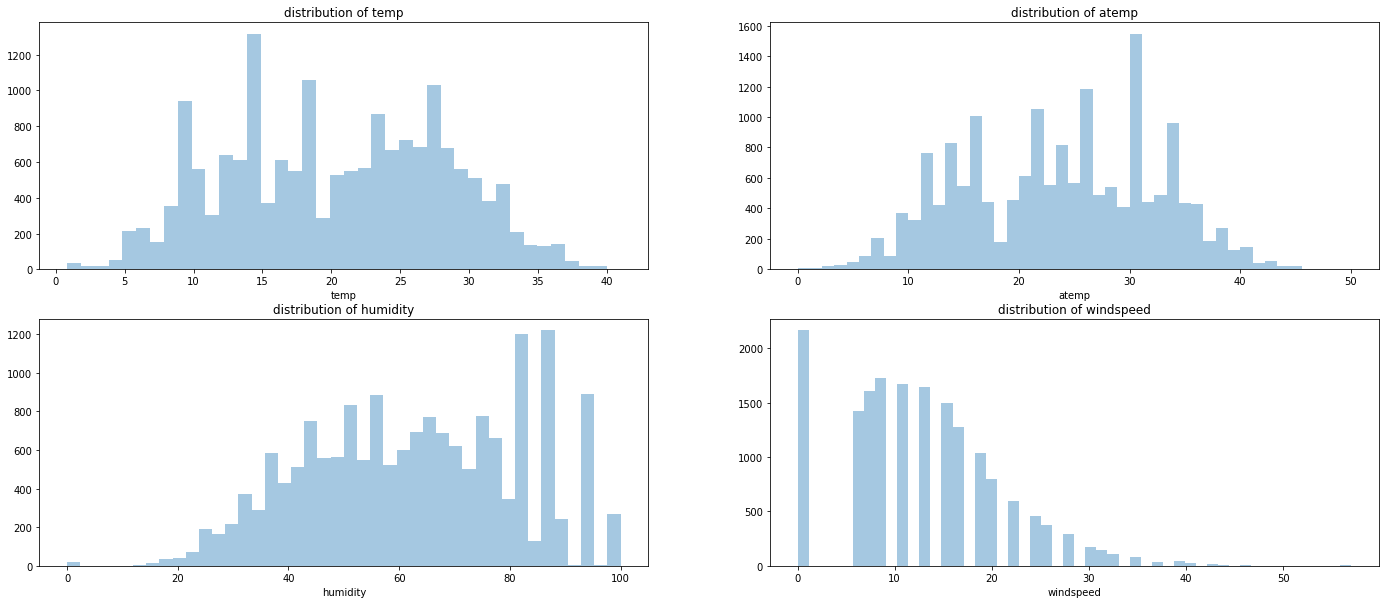

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2) #設定畫幾張圖
fig.set_size_inches(24, 10) #設定每個圖的尺寸
sns.distplot(data['temp'], ax=axes[0][0], kde=False) #畫連續圖型
sns.distplot(data['atemp'], ax=axes[0][1], kde=False)
sns.distplot(data['humidity'], ax=axes[1][0], kde=False)
sns.distplot(data['windspeed'], ax=axes[1][1], kde=False)

axes[0][0].set(xlabel='temp', title="distribution of temp") #附加標題
axes[0][1].set(xlabel='atemp', title="distribution of atemp")
axes[1][0].set(xlabel='humidity', title="distribution of humidity")
axes[1][1].set(xlabel='windspeed', title="distribution of windspeed")

In [28]:
#風速的圖型太過不準確，可以自行用rf_Model預測風速
dataWind0 = data[data['windspeed'] ==0 ] #把['windspeed']分為風速0的test
dataWindNot0 = data[data['windspeed'] !=0] #跟風速不為0的train

rfModel_wind = RandomForestRegressor(n_estimators=1000, random_state=42) #Model設置
windColumns = ['season', 'weather', 'humidity', 'year', 'month', 'temp', 'atemp'] #預測用來參考的columns
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0['windspeed']) #用fit把Model給train起來
                #前面放train學習資料         #後面放train學習結果

wind0Values = rfModel_wind.predict(X = dataWind0[windColumns]) #用predict讓Model預測資料
dataWind0.loc[:,'windspeed'] = wind0Values #把預測值放入原本風速0的位置
data = dataWindNot0.append(dataWind0) #將分割的資料合併回來
data.reset_index(inplace=True, drop=True) #一樣記得處理index

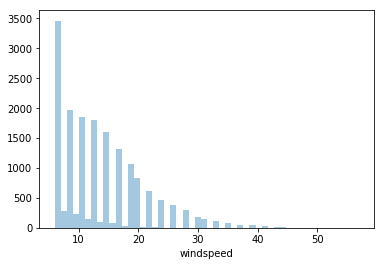

In [33]:
sns.distplot(data['windspeed'], kde=False)

In [36]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime']) #資料重新分割成整理後的Train (目標非空值)
dataTest = data[pd.isnull(data['count'])].sort_values(by=['datetime']) #跟整理後的Test (目標為空值)
datetimecol = dataTest['datetime'] #最後交出格式需要這個所以先萃取

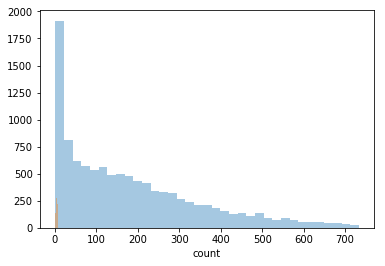

In [39]:
yLabels = dataTrain['count'] #為了畫 y為count的圖
sns.distplot(yLabels, kde=False)

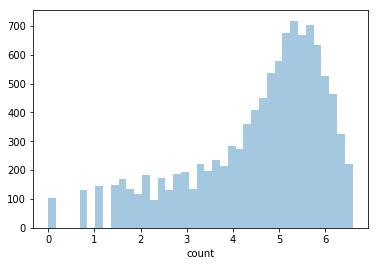

In [40]:
yLabelsLog = np.log(yLabels) #圖型很不常態分布，取log之後比較接近常態分布，才能用。
sns.distplot(yLabelsLog, kde=False)

In [41]:
dropFeatures = ['casual', 'count', 'datetime', 'date', 'registered'] #丟掉不必要的欄位
dataTrain = dataTrain.drop(dropFeatures, axis=1)
dataTest = dataTest.drop(dropFeatures, axis=1)

In [43]:
rfModel = RandomForestRegressor(n_estimators=1000, random_state=42) #一樣用rfModel預測總結果
rfModel.fit(dataTrain, yLabelsLog) #學習

preds = rfModel.predict(X = dataTrain)#用Train測試預測
preds

array([2.98101928, 3.45428712, 3.22183104, ..., 5.16853781, 4.93223093,
       4.54341758])

In [44]:
predsTest = rfModel.predict(X= dataTest) #使用目標的Test資料預測
submission = pd.DataFrame({'datetime':datetimecol, 'count':[ max(0, x) for x in np.exp(predsTest) ] }) #排序時記得用exp把log取回來

submission.to_csv('bike_predictions_RF.csv', index=False)

In [45]:
submission

,datetime,count
9442,2011-01-20 00:00:00,10.745707
16365,2011-01-20 01:00:00,4.945788
16366,2011-01-20 02:00:00,2.893334
9443,2011-01-20 03:00:00,3.022613
9444,2011-01-20 04:00:00,2.562929
9445,2011-01-20 05:00:00,5.300502
9446,2011-01-20 06:00:00,34.843568
9447,2011-01-20 07:00:00,91.300580
9448,2011-01-20 08:00:00,207.361663
9449,2011-01-20 09:00:00,122.615291
